загрузка данных

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
train_data.shape


(8982,)

Векторизация данных

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

vec_train_labels=vectorize_sequences(train_labels,dimension=46)
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

Вариант категориального кодирования с помощью готовой функции (почему-то не работает на train_data)

In [4]:
from keras.utils.np_utils import to_categorical

f=to_categorical(train_labels)
print(sum(sum(f-vec_train_labels)))

0.0


Выделяем 1000 образцов из тренироваочных данных для контроля точности на этапе обучения

In [5]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val= one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

Конструирование сети

In [6]:
from keras import models, layers

model=models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_labels)
print(results)

Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 2.2319 - acc: 0.5936 - val_loss: 1.4499 - val_acc: 0.7060
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1351 - acc: 0.7744 - val_loss: 1.1288 - val_acc: 0.7550
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7897 - acc: 0.8453 - val_loss: 0.9590 - val_acc: 0.8080
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5837 - acc: 0.8864 - val_loss: 0.8907 - val_acc: 0.8150
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4429 - acc: 0.9128 - val_loss: 0.8530 - val_acc: 0.8170
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.3468 - acc: 0.9296 - val_loss: 0.8080 - val_acc: 0.8290
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.2737 - acc: 0.9427 - val_loss: 0.8297 - val_acc: 0.8160
Epoch 8/20
16/16 [==============================] - 0s 16ms/step - loss: 0.2285 - a

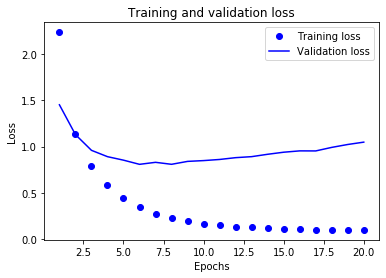

In [7]:
import matplotlib.pyplot as plt

history_dict=history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range (1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

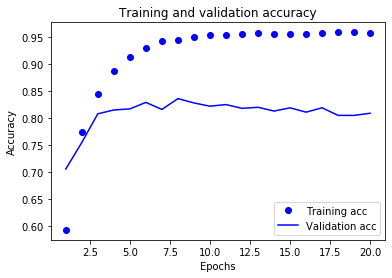

In [8]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label= 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
predictions = model.predict(x_test)

np.argmax(predictions[0])
predictions[3]

array([1.3734763e-05, 1.4969952e-05, 2.7990034e-06, 4.9910139e-02,
       8.5597289e-01, 7.6162619e-06, 1.2993883e-07, 5.1306943e-05,
       5.8176760e-05, 1.0028981e-05, 3.0160902e-05, 6.4655360e-05,
       3.9694960e-06, 4.4436852e-05, 1.2253968e-05, 5.7559571e-08,
       9.2814922e-02, 9.4489929e-05, 1.8180412e-05, 7.3933443e-05,
       4.9833005e-04, 3.6077428e-05, 4.4883674e-07, 7.3651486e-06,
       1.5859838e-05, 1.0799839e-04, 5.5139115e-08, 6.1178430e-06,
       8.7863182e-06, 3.7890779e-06, 5.7650386e-06, 3.2892842e-06,
       8.3128180e-06, 2.6091295e-06, 1.0670205e-07, 1.9903805e-06,
       4.2920423e-05, 1.5762647e-06, 1.8464343e-06, 1.3858880e-05,
       1.3870919e-06, 2.8926701e-05, 3.1506210e-07, 5.5792719e-07,
       1.7926565e-09, 2.7418885e-06], dtype=float32)